In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering

from gensim.models import Word2Vec
import nltk
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
import re
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
import random
from sklearn.decomposition import LatentDirichletAllocation

embedder = SentenceTransformer('distilroberta-base-paraphrase-v1')

In [2]:
df = pd.read_csv("Foia.csv")
df = df.fillna(method="ffill")

In [3]:
sentence = []
for index, row in df.iterrows():
    sentence.append(row['Description'])

In [4]:
corpus_embeddings = embedder.encode(sentence)

In [5]:
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

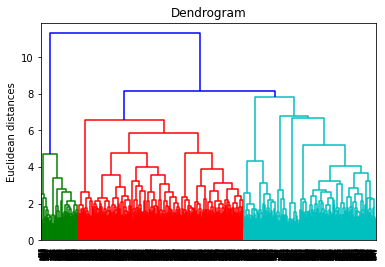

In [6]:
Z = hierarchy.linkage(corpus_embeddings, "ward")
dn = hierarchy.dendrogram(Z)
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
#plt.xlim(0,100)
#plt.ylim(1.2,1.4)
plt.show()

In [7]:
clustering_model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=3) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(sentence[sentence_id])


#for i, cluster in clustered_sentences.items():
    #print("Cluster ", i+1)
    #print(cluster)
    #print("")

In [8]:
length = len(clustered_sentences)

In [9]:
def exe():
    D = {}
    for i,topic in enumerate(LDA.components_):
        x = [count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]]
        for j in x:
            if j in D:
                D[j] += 1
            else: D[j] = 1
    Sorted = sorted(D.items(), key=lambda x: x[1], reverse=True)
    lst = []
    Useless_Word = ["requesting","request", "requests", "copy", "copies", "documents", "document", "information", "informations", "department", "departments", "records", "record", "reports", "report",'pertaining', 'concerning', 'regarding','list'] 
    for i in Sorted:
        if i[0] in Useless_Word:
            None
        else:
            lst.append(i[0])
        if len(lst) == 3:
            return lst   

In [10]:
for i in range(length):
    count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
    doc_term_matrix = count_vect.fit_transform(clustered_sentences[i])
    LDA = LatentDirichletAllocation(n_components=5, random_state=42)
    LDA.fit(doc_term_matrix)
    print(f"Cluster Number {i+1}: ", exe())
    print("Cluster Size: ", len(clustered_sentences[i]))
    print('\n')

Cluster Number 1:  ['data', 'government', 'address']
Cluster Size:  103


Cluster Number 2:  ['iraq', '2006', 'military']
Cluster Size:  96


Cluster Number 3:  ['awarded', 'defense', 'contracts']
Cluster Size:  181


Cluster Number 4:  ['defense', 'research', 'program']
Cluster Size:  160


Cluster Number 5:  ['relating', '2001', 'secretary']
Cluster Size:  194


Cluster Number 6:  ['war', 'following', 'intelligence']
Cluster Size:  137


Cluster Number 7:  ['military', 'service', 'defense']
Cluster Size:  114


Cluster Number 8:  ['2006', 'relating', 'iraqi']
Cluster Size:  144


Cluster Number 9:  ['requester', 'military', 'united']
Cluster Size:  93


Cluster Number 10:  ['army', 'dodig', 'file']
Cluster Size:  105


Cluster Number 11:  ['ronald', 'national', 'nsdd']
Cluster Size:  93


Cluster Number 12:  ['release', 'state', 'brigade']
Cluster Size:  116


Cluster Number 13:  ['releasable', 'solicitation', 'program']
Cluster Size:  80


Cluster Number 14:  ['number', 'foia', 'con

In [11]:
clustered_sentences[0]

['A clearly releasable copy of the awarded purchase order number HQ003406P1149 awarded to Yancy and Associates, Inc.',
 'Cost proposal of winning bidder: Lightship Group Solicitation: Machinery Condition Analysis Services Solicitation No. N00189-04-R-0023 and Milstrip N6279304RCCV013 Purchase Request Number N6279304RCCV013.',
 "The position descriptions of all Priority Placement Program (PPP) matches for the entire duration of requester's one year registry (25 June 2003 thru 30 September\n2004).",
 'Please provide selection debrief for Solicitaiton FA 8519-06-R-71150.',
 'Every offer submitted in response to Solicitation N62473-06-RP-06X01 for the\nNavy Broadway Complex in San Diego, California.',
 'A list of purchasing dept contacts and the individuals that hold government credit cards for there divisions purchasing for the Washington DC, MD and VA area.',
 'Joint Advertising and Market Research Recuting Data base.',
 'SK1 officer information: Name, address, phone number, agency name,